# **$k$ Nearest Neighbors**



Download the [NYC Building Energy Efficiency](https://www.kaggle.com/datasets/alistairking/nyc-building-energy-efficiency-ratings/data?select=geojson_lookup_rows.csv) dataset [here](https://drive.google.com/file/d/1eSTMHM_l74_AfEPl9xcZtHJxHOwSxP0l/view?usp=sharing) \
```k-NN``` documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
merged_data = pd.read_csv('/content/energy_ny_buildings_curated.csv')

# Split the data into features (X) and target (y)
X = merged_data[['DOF_Gross_Square_Footage_x', 'Energy_Star_1-100_Score_x']]
y = merged_data['Energy_Efficiency_Grade_x']

In [ ]:
sns.pairplot(merged_data, hue='Energy_Efficiency_Grade_x', corner=True)

<Axes: xlabel='DOF_Gross_Square_Footage_x', ylabel='Energy_Star_1-100_Score_x'>

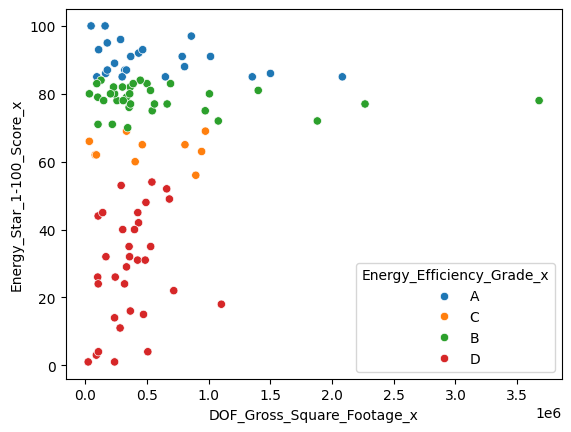

In [5]:
sns.scatterplot(data = merged_data, x = 'DOF_Gross_Square_Footage_x', y='Energy_Star_1-100_Score_x', hue = 'Energy_Efficiency_Grade_x')

In [7]:
# Instance kNN object
n_neighbors = 5
knn = kNN(n_neighbors = 3 , metric = "euclidean")

# Training
knn.fit( X , y ) # (num_samples, num_features), (num_samples)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [8]:
# Model Evaluation
y_pred = knn.predict(X)

# Print Classification Report
print("Classification Report:")
print(classification_report(y, y_pred))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           A       0.47      0.78      0.59        23
           B       0.46      0.38      0.42        34
           C       0.67      0.40      0.50        10
           D       0.61      0.52      0.56        33

    accuracy                           0.52       100
   macro avg       0.55      0.52      0.52       100
weighted avg       0.53      0.52      0.51       100

Confusion Matrix:
[[18  1  1  3]
 [12 13  1  8]
 [ 2  4  4  0]
 [ 6 10  0 17]]


In [14]:
# Valores minimos y maximos para crear el grid de las fronteras de decision
h_min, h_max = X.iloc[:, 0].min(), X.iloc[:, 0].max()
v_min, v_max = X.iloc[:, 1].min(), X.iloc[:, 1].max()

# Crear el grid de las fronteras de decision
h_grid,v_grid = np.meshgrid(np.linspace(h_min, h_max, 100), np.linspace(v_min, v_max, 100))

# Predecir los valores del grid
pred_grid= knn.predict(np.c_[h_grid.ravel(), v_grid.ravel()])
print (pred_grid.shape)
# Encajar las predicciones al tamaño del grid
pred_grid = pred_grid.reshape(h_grid.shape)
print (pred_grid.shape)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(10000,)
(100, 100)


ValueError: could not convert string to float: 'B'

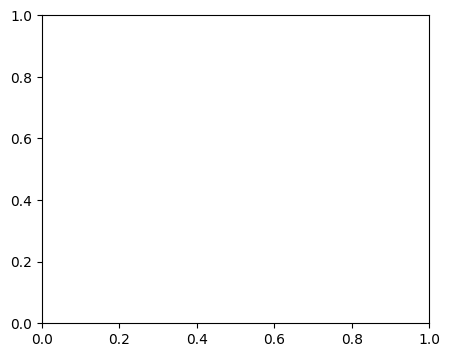

In [24]:
# Dibujar el grid y las fronteras de decision
_, ax = plt.subplots (figsize=(5,4))

# ax.pcolormesh(h_grid, v_grid, pred_grid, cmap = 'Paired')
sns.heatmap(pred_grid, cmap='Paired', cbar=False)

# Imprimir las muestras con el scatter
sns.scatterplot(data = merged_data, x = 'DOF_Gross_Square_Footage_x', y='Energy_Star_1-100_Score_x', hue = 'Energy_Efficiency_Grade_x')

ax.set_xlim(h_grid.min(), h_grid.max())
ax.set_ylim(v_grid.min(), v_grid.max())

ax.set_xticks(())
ax.set_yticks(())

In [22]:
pred_grid

array([['B', 'A', 'A', ..., 'B', 'B', 'B'],
       ['B', 'A', 'A', ..., 'B', 'B', 'B'],
       ['B', 'A', 'A', ..., 'B', 'B', 'B'],
       ...,
       ['B', 'A', 'A', ..., 'B', 'B', 'B'],
       ['B', 'A', 'A', ..., 'B', 'B', 'B'],
       ['B', 'A', 'A', ..., 'B', 'B', 'B']], dtype=object)

## Using the Fruits dataset

Download the fruits data [here](https://drive.google.com/file/d/1M8tiAWDZclABJN1Meq9oEHCLJTNyHdpP/view?usp=share_link)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.datasets import load_iris # Iris dataset

In [ ]:
fruit_data = _ # Load the fruits dataset
fruits_x = _  # Features. We'll pick 2
fruits_y = _  # Labels

# Convert everything to a np array
fruits_x, fruits_y = np.asarray(fruits_x), np.asarray(fruits_y)

# Print shapes
print ( _ )

In [ ]:
# Instance kNN object
n_neighbors = _
knn = kNN(n_neighbors = _ )

# Training
 _ #(num_samples, Features)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
## Plot decision boundaries
_